# Quantization example of symmetric
<br />
<font size=3>
此篇量化範例用一組500筆的隨機亂數，示範對稱(symmetric)量化的方式，將FP32資料量化到INT4。<br />

引入需要的函式庫
<font>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## 1. 產生一組亂數資料

In [9]:
# 設定亂數種子
np.random.seed(10)
# 產生500筆常態分佈數據
xf = np.random.normal(loc=0, scale=1, size=(500))

## 2. 量化數據

<font size=3>此範例將數據量化到4-bit的資料型態，對稱(symmetric)量化的方式為:</font>

### 1. 觀察資料範圍
$$ range_{x_f} = max(|{x_f}|) $$
### 2. 計算scale
$$ \alpha _x = \frac {2^{n-1}-1}{max(|{x_f}|)} \quad $$
### 3. 量化$x_f$
$$ x_q = round(x_f \alpha _x) $$


In [3]:
# 量化bit數為4
bit = 4
# 計算Scale
scale = (2**(bit - 1) - 1) / np.abs(xf.max())
# 量化 (Quantize)
xq = np.round(xf * scale)
# 偽量化 (Fake-Quantize)
xfq = xq / scale

<font size=3>偽量化(fake-quantize)，也可以稱反量化，是將被量化的數據$x_q$還原到FP32資料型態數據$x_{fq}$，通常會將原始數據$x_f$與$x_{fq}$比對，來驗證量化的效果。</font>

<font size=3>可以用畫圖的方式，看一下量化的結果:</font>

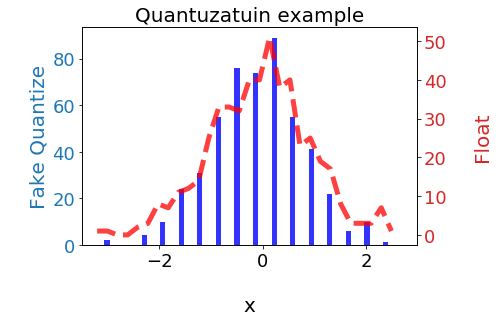

In [8]:
# 畫圖
fig, ax1 = plt.subplots()
plt.title('Quantuzatuin example', fontsize=20)
plt.xlabel('\nx', fontsize=20)
ax2 = ax1.twinx() # 產生axes2與axes1同一平面

# 產生float x的長條分布圖，但不顯示在圖上
fn, fbins, _ = ax2.hist(xf, bins=30, facecolor='blue', alpha=0.5)
plt.cla() # 清除圖中的畫面
    
# 產生fake quantize x的長條分布圖
ax1.set_ylabel('\nFake Quantize', color='tab:blue', fontsize=20)
n, bins, _ = ax1.hist(xfq, bins=16, facecolor='blue', alpha=0.8, width=0.1)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=18)

# 利用先前產生hist的數據，畫float x的分布圖
ax2.set_ylabel('\nFloat', color='tab:red', fontsize=20)
ax2.plot(fbins[:-1], fn, 'r--', alpha=0.75, linewidth=5)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelcolor='tab:red', labelsize=18)